# DISummit 2018 - Introduction to Texmining
Provided by [Xplodata](https://www.xplodata.be/)

## Extracting text from a PDF
### With a python package
e.g.: [PyPDF2](https://pypi.org/project/PyPDF2/)


In [1]:
import PyPDF2

# creating an object 
file = open(r'..\data\input_pdf\Tanzania_SummarySheet_English.pdf', 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader.numPages)
print()

# print text on last page
print(fileReader.pages[-1].extractText())

# close the file-stream
file.close()


6

6Tanzania HIV Impact Survey (THIS) is part of the 
Population Based HIV Impact Assessment (PHIA) Project 
which is a multi-country project funded by PEPFAR to 
conduct national HIV-focused surveys that describe the 
status of the HIV epidemic. Results will measure important 
national and regional HIV-related parameters, including 
progress toward 90-90-90 goals, and will guide policy 
and funding priorities. ICAP at Columbia University is 
implementing the PHIA Project in close collaboration with 
CDC and other partners.
 See phia.icap.columbia.edu for more details. 
This project is supported by the U.S. PresidentÕs Emergency Plan for AIDS Relief (PEPFAR) through CDC under the terms of cooperative agreement 
#U2GGH001226. The Þndings and conclusions in this report are those of the authors and do not necessarily represent the ofÞcial position of the funding 
agencies. The results presented should be considered preliminary and they are subject to change.
The mark ÒCDCÓ is owned by the

Disadvantages:
    - no control over character encodings
    - no image extraction

### With an external toolset
e.g.: [PDFTOTEXT](http://www.xpdfreader.com/)

The commandline can be accessed using the `subprocess` package.

In [2]:
import subprocess

# define file paths
in_file = r'..\data\input_pdf\Tanzania_SummarySheet_English.pdf'
out_file = r'..\output\output_txt\utf8_encoded.txt'

# make and execute command to convert to txt using UTF-8 encoding for resulting txt file
pdf_txt_command = ["pdftotext", "-enc", "UTF-8", in_file, out_file]
subprocess.run(pdf_txt_command, shell=True)

CompletedProcess(args=['pdftotext', '-enc', 'UTF-8', '..\\data\\input_pdf\\Tanzania_SummarySheet_English.pdf', '..\\output\\output_txt\\utf8_encoded.txt'], returncode=0)

In [3]:
# We can now open the textfile with the specified encoding
with open(out_file, mode='rt', encoding='utf-8') as txt_file:
    print(txt_file.read()[-900:])

 important national and regional HIV-related parameters, including progress toward 90-90-90 goals, and will guide policy and funding priorities. ICAP at Columbia University is implementing the PHIA Project in close collaboration with CDC and other partners. See phia.icap.columbia.edu for more details.
The mark “CDC” is owned by the US Dept. of Health and Human Services and is used with permission. Use of this logo is not an endorsement by HHS or CDC of any particular product, service, or enterprise. This project is supported by the U.S. President’s Emergency Plan for AIDS Relief (PEPFAR) through CDC under the terms of cooperative agreement #U2GGH001226. The ﬁndings and conclusions in this report are those of the authors and do not necessarily represent the ofﬁcial position of the funding agencies. The results presented should be considered preliminary and they are subject to change.
6




However, if we're not sure of the character encoding in the pdf-file we can choose to not specify it during our conversion and make a *guess* later.

We can use the `chardet` package for *guessing* character encodings.

In [4]:
# define file paths
in_file = r'..\data\input_pdf\Tanzania_SummarySheet_English.pdf'
out_file = r'..\output\output_txt\guess_encoding.txt'

# make and execute command to convert to txt, without specifying an encoding
pdf_txt_command = ["pdftotext", in_file, out_file]
subprocess.run(pdf_txt_command, shell=True)

CompletedProcess(args=['pdftotext', '..\\data\\input_pdf\\Tanzania_SummarySheet_English.pdf', '..\\output\\output_txt\\guess_encoding.txt'], returncode=0)

In [5]:
import chardet

# read file as bytes
with open(out_file, mode='rb') as byte_file:
    raw_input = byte_file.read()

# guess encoding
encodings = chardet.detect(raw_input)
print(encodings)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [6]:
# decode bytes to string
text = raw_input.decode('8859')
print(text[-900:])

tant national and regional HIV-related parameters, including progress toward 90-90-90 goals, and will guide policy and funding priorities. ICAP at Columbia University is implementing the PHIA Project in close collaboration with CDC and other partners. See phia.icap.columbia.edu for more details.
The mark "CDC" is owned by the US Dept. of Health and Human Services and is used with permission. Use of this logo is not an endorsement by HHS or CDC of any particular product, service, or enterprise. This project is supported by the U.S. President's Emergency Plan for AIDS Relief (PEPFAR) through CDC under the terms of cooperative agreement #U2GGH001226. The findings and conclusions in this report are those of the authors and do not necessarily represent the official position of the funding agencies. The results presented should be considered preliminary and they are subject to change.
6




We will continue the rest of the examples with the `ISO-8859-1` decoded text.

For more info on supported codecs, visit the python [docs](https://docs.python.org/3/library/codecs.html#standard-encodings)

## Extracting images from a PDF
#### Using  [PDFIMAGES](http://www.xpdfreader.com/)

PDFimages comes from the same toolset as pdftotext and we also call it using the `subprocess` package.

In [7]:
import os

# define file paths
in_file = r'..\data\input_pdf\Tanzania_SummarySheet_English.pdf'
images = r'..\output\output_img'

# extract images
pdf_img_command = ["pdfimages", "-j", in_file, images + r'\img']
subprocess.run(pdf_img_command, shell=True)

# convert to jpg
for filename in os.listdir(images):
    if filename[-4:] == '.ppm':
        ppm_in = os.path.join(images, filename)
        jpg_out = os.path.join(images, filename[:-4] + '.jpg')
        convert_command = ["convert.exe", ppm_in, jpg_out]
        subprocess.check_output(convert_command, shell=True)

## Language detection


In [8]:
from langdetect import detect

language = detect(text)
print(language)

en


## Tokenization & POS-tagging

Until now we were preparing the Textmining.
Converting pdf to text and analyzing some meta-data.

Now we want to work on the actual data, for that we use the 'Natural Language Toolkit': `nltk`

We can split the full text up in smaller parts -> tokenizing

We can assing labels/tags to the tokens, this process is called 'Part-Of-Speech' tagging and attempts to give gramatical meaning to a token.

The default tags `nltk` produces can be found [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [9]:
import nltk

# break text up into smaller bits -> tokens
# sentences
sentences = nltk.sent_tokenize(text)
# words
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
# POS tagged tokens
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]

Let's look at an example of a tagged and chunked sentence.

In [17]:
# take a random sentence
sentence = chunked_sentences[-42]
print(sentence)
# the drawing will show up in a pop-up window.
sentence.draw()

## Stemming & Lemmatization

For Lemmatization we are using the 'wordnet' model.
When using this for the first time, you need to download this model first!

In [27]:
from nltk.stem import PorterStemmer
import nltk.stem.wordnet as wordnet
# nltk.download('wordnet')

# determine which tokens we want to consider
# shorthand POS tag lists:
adj = ['JJ', 'JJR', 'JJS']
noun = ['NN', 'NNS', 'NNP', 'NNPS']
adverb = ['RB', 'RBR', 'RBS']
verb = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# interesting tokens
i_tokens = [(token, tag)\
            for sentence in tagged_sentences\
            for (token, tag) in sentence\
            if token.isalpha()\
            and tag in adj + noun + adverb + verb]

# stem interesting tokens
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for (token, tag) in i_tokens]

# Lemmatize interesting tokens
lemmatizer = wordnet.WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for (token, tag) in i_tokens]

## Wordclouds
Lets make a wordcloud of the original text, the stemmed tokens and the lemmatized tokens to get an idea of what they do.

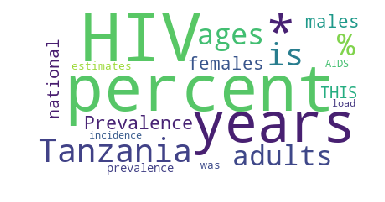

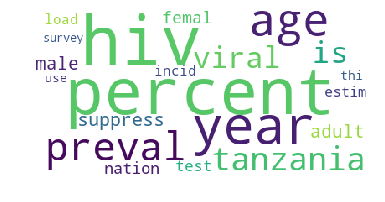

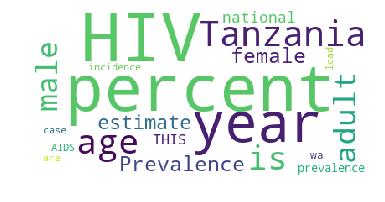

[('HIV', 48), ('percent', 43), ('years', 35), ('Tanzania', 20), ('is', 18), ('ages', 15), ('adults', 14), ('Prevalence', 12), ('females', 11)]
[('hiv', 48), ('percent', 43), ('year', 37), ('age', 26), ('preval', 24), ('tanzania', 21), ('is', 18), ('viral', 17), ('suppress', 16)]
[('HIV', 48), ('percent', 43), ('year', 37), ('Tanzania', 20), ('age', 19), ('is', 18), ('adult', 14), ('male', 13), ('Prevalence', 12)]


In [28]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# we want to filter out common (stop)words, like: 'the', 'and', ...
stopwords = set(STOPWORDS)

# original tokens
orig_c = Counter([token for (token, tag) in i_tokens])
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=20,
                          max_font_size=80, 
                          random_state=42
                         ).generate_from_frequencies(dict(c))
plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')

# stemmed tokens
stemmed_c = Counter(stemmed_tokens)
stemmed_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=20,
                          max_font_size=80, 
                          random_state=42
                         ).generate_from_frequencies(dict(stemmed_c))
plt.figure(2)
plt.imshow(stemmed_wordcloud)
plt.axis('off')

# lemmatized tokens
lemm_c = Counter(lemmatized_tokens)
lemmatized_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=20,
                          max_font_size=80, 
                          random_state=42
                         ).generate_from_frequencies(dict(lemm_c))
plt.figure(3)
plt.imshow(lemmatized_wordcloud)
plt.axis('off')

# and show them
plt.show()

# compare with the Counters:
print(orig_c.most_common(9))
print(stemmed_c.most_common(9))
print(lemm_c.most_common(9))

## Named Entity Recognition

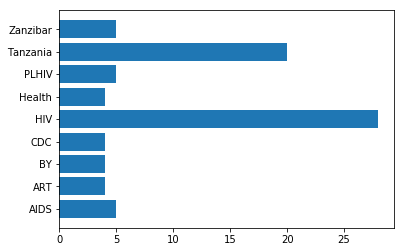

In [47]:
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)
named_entities = [chunk.leaves() for sent in chunked_sentences for chunk in sent if hasattr(chunk, "label") and chunk.label() == "NE"]
NE_tokens = [token for leaves in named_entities for (token, tag) in leaves]

ctr = Counter(NE_tokens)
tokens, weights = zip(*ctr.most_common(9))

plt.barh(tokens, weights)
plt.show()